In [10]:
import pandas as pd

df = pd.read_csv("water_volume_raw.csv", header=None, names=["date_raw", "volume_km3"])
df["date"] = pd.to_datetime(df["date_raw"].astype(str), format="%Y%m%d", errors="coerce")
df = df.dropna(subset=["date"])
df = df.sort_values("date", ignore_index=True)
df_nodup_first = df.drop_duplicates(subset="date", keep="first")
df_avg = df.groupby("date", as_index=False)["volume_km3"].mean().sort_values("date")


In [11]:
df_clean = df_avg  

df_clean.to_csv("water_volume_clean.csv", index=False)
df_clean.head()


,date,volume_km3
0,2016-02-01,0.151026
1,2016-02-25,0.025093
2,2016-04-13,0.030658
3,2016-04-29,0.028261
4,2016-05-25,0.018992


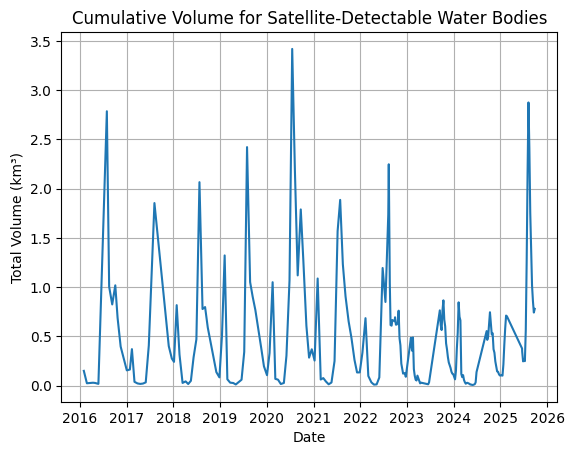

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_clean["date"], df_clean["volume_km3"])
plt.xlabel("Date")
plt.ylabel("Total Volume (km³)")
plt.title("Cumulative Volume for Satellite-Detectable Water Bodies")
plt.grid(True)
plt.show()


In [13]:
monthly = df_clean.set_index("date")["volume_km3"].resample("M").mean().reset_index()
monthly.to_csv("water_volume_monthly.csv", index=False)
monthly.head()


C:\Users\adelz\AppData\Local\Temp\ipykernel_25320\3142698261.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_clean.set_index("date")["volume_km3"].resample("M").mean().reset_index()


,date,volume_km3
0,2016-02-29,0.088059
1,2016-03-31,NaN
2,2016-04-30,0.029459
3,2016-05-31,0.018992
4,2016-06-30,NaN


c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:01:55 - cmdstanpy - INFO - Chain [1] start processing
00:01:56 - cmdstanpy - INFO - Chain [1] done processing


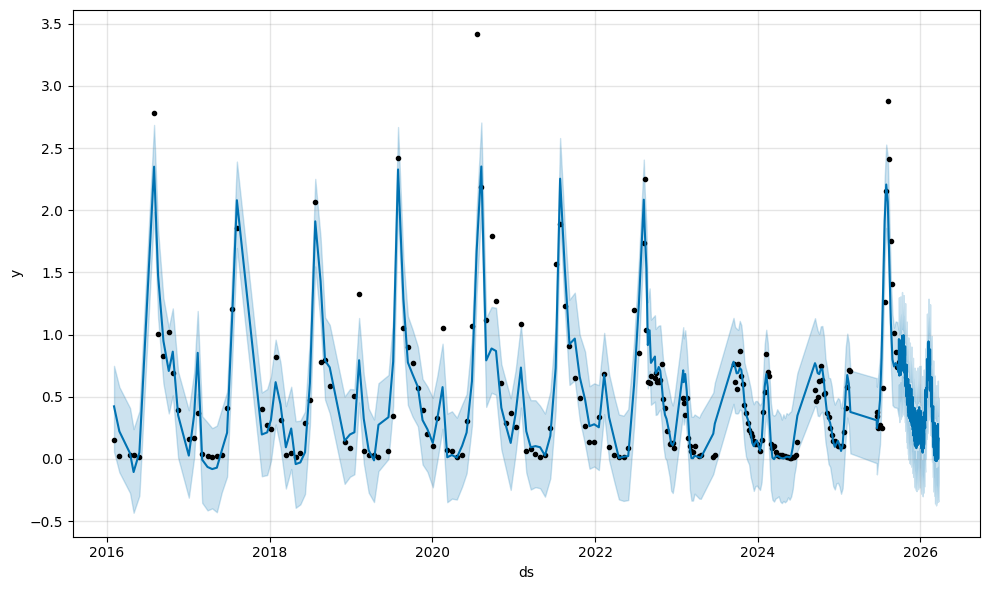

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("water_volume_clean.csv")

# Prophet requires columns: ds (date), y (value)
df = df.rename(columns={"date": "ds", "volume_km3": "y"})

# Train model
model = Prophet()
model.fit(df)

# Forecast 180 days ahead
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot
fig1 = model.plot(forecast)
plt.show()
